In [58]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll

In [81]:
n_samples = 10_000
data, _ = make_swiss_roll(n_samples)
data = data[:, [2, 0]] / 10
data = data * np.array([1, -1])

(-2.0, 2.0)

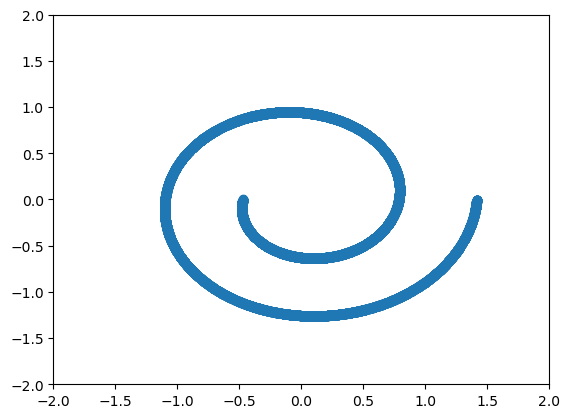

In [82]:
plt.scatter(data[:, 0], data[:, 1])
plt.xlim([-2, 2])
plt.ylim([-2, 2])

In [83]:
def forward_process(data, T, betas):   
    
    for t in range(T):
        beta_t = betas[t]
        mu = data * torch.sqrt(1 - beta_t)
        std = torch.sqrt(beta_t)
        # Sample from q(x_t | x_{t-1})
        data = mu + torch.randn_like(data) * std # data ~ N(mu, std)
    return data

In [84]:
T = 40
betas = torch.sigmoid(torch.linspace(-18, 10, T)) * (3e-1 - 1e-5) + 1e-5
xT = forward_process(torch.from_numpy(data), T, betas)

In [85]:
print(xT.mean(0))
print(xT.std(0))

tensor([ 0.0134, -0.0224], dtype=torch.float64)
tensor([1.0090, 0.9848], dtype=torch.float64)


(-2.0, 2.0)

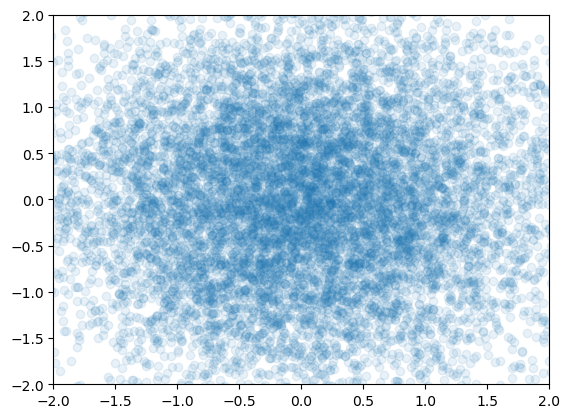

In [88]:
plt.scatter(xT[:, 0].data.numpy(), xT[:, 1].data.numpy(), alpha=0.1)
plt.xlim([-2, 2])
plt.ylim([-2, 2])